In [3]:
'''
Problem Statement:

'''


'\nProblem Statement:\n\n'

In [4]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.read_csv("/home/tanisha/DL/LP-IV-datasets/ECGdataset(Ass4)/ecg_autoencoder_dataset.csv", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [7]:
X = df.drop([140], axis = 1)
y = df[140]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
encoder = Sequential([Dense(64, activation = 'relu', input_shape = (X_train.shape[1],))])
decoder = Sequential([Dense(X_train.shape[1], activation = 'sigmoid')])

In [11]:

autoencoder = Sequential([encoder, decoder])

In [12]:
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])


In [13]:
r = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 64, validation_data= (X_test, X_test))


Epoch 1/100
55/55 [==============================] - 1s 4ms/step - loss: 1.0014 - accuracy: 0.0146 - val_loss: 0.7850 - val_accuracy: 0.0293
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.0515 - val_loss: 0.7092 - val_accuracy: 0.0847
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.0729 - val_loss: 0.6899 - val_accuracy: 0.0893
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.0849 - val_loss: 0.6796 - val_accuracy: 0.0873
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.0915 - val_loss: 0.6726 - val_accuracy: 0.0947
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.0952 - val_loss: 0.6670 - val_accuracy: 0.1133
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.1023 - val_loss: 0.6625 - val_accuracy: 0.1187
Epoch 8/100
5

In [14]:
r.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'loss')

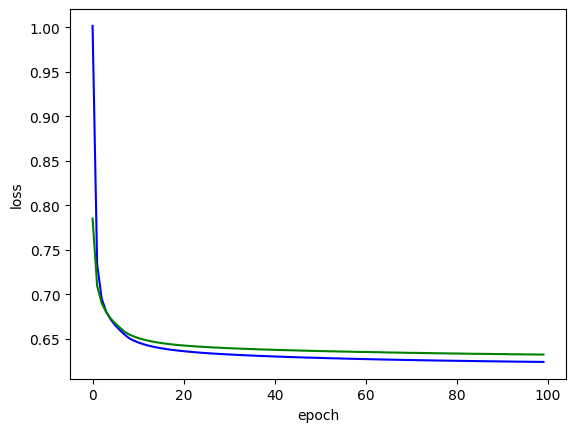

In [15]:
plt.plot(r.history['loss'], label = 'loss', color = 'blue')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend
plt.xlabel('epoch')
plt.ylabel('loss')

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

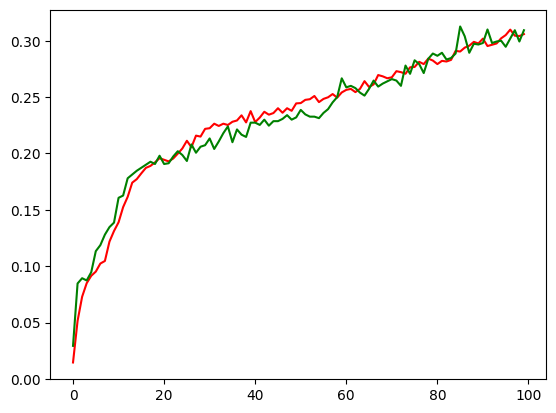

In [16]:
plt.plot(r.history['accuracy'], label = 'acc', color = 'red')
plt.plot(r.history['val_accuracy'], label = 'val_acc', color = 'green')
plt.legend

In [17]:
loss = autoencoder.evaluate(X_test, X_test)
print(f'Test Loss: {loss}')

47/47 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.3093
Test Loss: [0.6321761012077332, 0.30933332443237305]


In [18]:
decoded_data = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - decoded_data, 2), axis = 1)
threshold = np.percentile(mse, 95)

outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

47/47 [==============================] - 0s 903us/step
Confusion Matrix:
 [[575  47]
 [850  28]]
Classification report:
               precision    recall  f1-score   support

           0       0.40      0.92      0.56       622
           1       0.37      0.03      0.06       878

    accuracy                           0.40      1500
   macro avg       0.39      0.48      0.31      1500
weighted avg       0.39      0.40      0.27      1500



In [19]:
num_outliers = np.sum(outliers)
num_anomalies = np.sum(y_test[outliers] == 1)

In [20]:

print(f'Number of outliers: {num_outliers}')
print(f'Number of anomalies: {num_anomalies}')

Number of outliers: 75
Number of anomalies: 28
